<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [3]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 

import os
import re
from functools import reduce
from collections import defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Customer Analysis

In [4]:
os.listdir()

['.config',
 '1_order_payments_dataset.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'online_retail_II.xlsx',
 'sales_vs_discount.csv',
 'sales.csv',
 'groceries.csv',
 'sample-sales-data.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'scanner_data.csv',
 'test.csv',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mock_sales_data.csv',
 'online_retail.xlsx',
 'sales_data_with_stores.csv',
 'sample_data']

In [5]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns = [re.sub(' ', '', re.sub(' \(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annualincome,spendingscore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


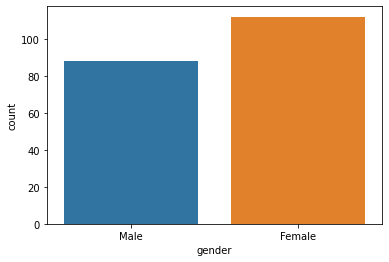

In [7]:
sns.countplot(data = df, x = 'gender')

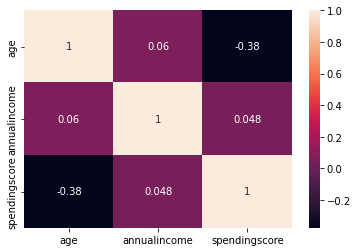

In [8]:
sns.heatmap(data = df[df.gender == 'Female'].drop(['customerid'], axis = 1).corr(), annot = True)

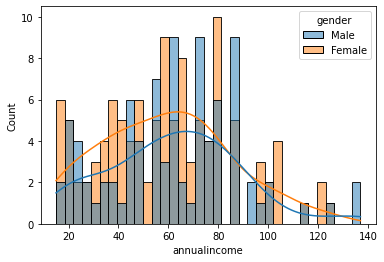

In [11]:
sns.histplot(data = df, x = 'annualincome', hue = 'gender', bins = 35, kde = True)


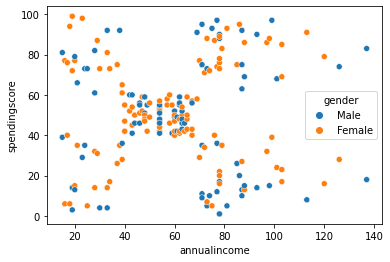

In [12]:
sns.scatterplot(data = df, x=  'annualincome', y = 'spendingscore', hue = 'gender')

In [16]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['spendingscore', 'annualincome']])
km = KMeans(n_clusters = 5, random_state=10) 
km.fit(df_std)
df['flag'] = km.fit_predict(df_std).astype(str)
df.head()

,customerid,gender,age,annualincome,spendingscore,flag
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


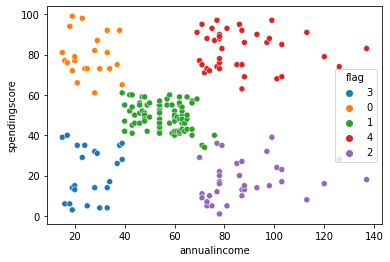

In [17]:
sns.scatterplot(data = df, x = 'annualincome', y = 'spendingscore', hue = 'flag')

# Iterator

In [33]:
names = np.random.choice(['choi', 'kim', 'kwon'], 100, replace = True)

def get_score(names) :

  uniques, counts = np.unique(names, return_counts = True)
  unique = dict(zip(uniques, counts))

  res = list() 

  for k, v in unique.items() :

    m = np.random.normal(50, 30, 1)
    s = np.abs(np.random.normal(10, 10, 1))

    score = [abs(a) if a <= 100 else 100 for a in np.random.normal(m, s, v)]
    
    temp = pd.DataFrame({'names' : np.repeat(k, v),
                         'score' : score
                         })
    res.append(temp)
  
  return pd.concat(res)

res = get_score(names)
res.head()

,names,score
0,choi,10.994984
1,choi,27.928690
2,choi,26.570116
3,choi,21.045549
4,choi,7.776867


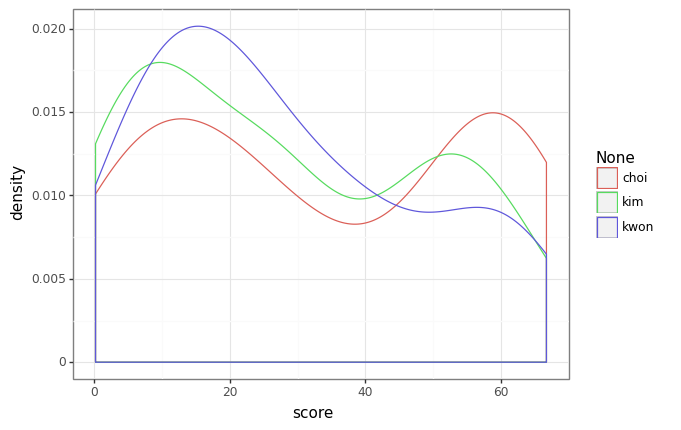

<ggplot: (8785175550745)>

In [34]:
(
    ggplot(res, aes('score', color = names)) +
    gg.geom_density() +
    gg.theme_bw()
)